<a href="https://colab.research.google.com/github/TejasOhlan/Digit-Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digit recognition system

##1. Load Dataset

In [1]:
#loading required libraries
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


tensorflow : open-source library for number of various tasks in machine leaerning. </br> 
Keras : A high-level neural-network library written in python.</br><b>
what does HIGH LEVEL mean here?</br></b>
Sequential : it is a type of model in keras which is used when you have a single input and a single output in your model as well as in your layers. As the name suggests it works sequentially layer by layer.

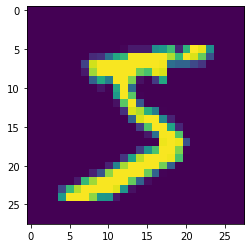

Label:  5


In [3]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

##2. Data Preprocessing


In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#reshaping data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

#(one-hot encoding in y_train and y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 784) (10000, 784) (60000, 10) (10000, 10)


Why do we reshape data- so that we can feed the data into the neural network


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

**Layers** are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function.

**Optimizers** tie together the loss function and model parameters by updating the model in response to the output of the loss function. </br>
**In simpler terms**, optimizers shape and mold your model into its most accurate possible form by futzing with the weights.

In [6]:
model = Sequential()

model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

**Sigmoid**- The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.

**Softmax** - The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. By definition, the softmax activation will output one value for each node in the output layer

In [8]:
sgd = optimizers.SGD(learning_rate= 0.01)  #lr is learning rate
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Basic NN model

Naive MLP model without any alterations

In [9]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose = 1)
#verbose = 1 ... means it will show progress bar for each epoch
#verbose = 0 ... means it will hide the progress of the model

Epoch 1/100
3000/3000 [==============================] - 6s 2ms/step - loss: 2.2954 - accuracy: 0.1294
Epoch 2/100
3000/3000 [==============================] - 5s 2ms/step - loss: 2.2535 - accuracy: 0.2225
Epoch 3/100
3000/3000 [==============================] - 5s 2ms/step - loss: 1.9475 - accuracy: 0.3714
Epoch 4/100
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4263 - accuracy: 0.5181
Epoch 5/100
3000/3000 [==============================] - 5s 2ms/step - loss: 1.1552 - accuracy: 0.6349
Epoch 6/100
3000/3000 [==============================] - 5s 2ms/step - loss: 0.9984 - accuracy: 0.7044
Epoch 7/100
3000/3000 [==============================] - 5s 2ms/step - loss: 0.9312 - accuracy: 0.7163
Epoch 8/100
3000/3000 [==============================] - 5s 2ms/step - loss: 0.8993 - accuracy: 0.7193
Epoch 9/100
3000/3000 [==============================] - 5s 2ms/step - loss: 0.8800 - accuracy: 0.7194
Epoch 10/100
3000/3000 [==============================] - 5s 2ms/step - l

In [10]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.2767 - accuracy: 0.9190
Test accuracy:  0.9190000295639038


What is Batchnormalization?- epoch training time is redused by standardising the inputs</br> Relu/Sigmoid/Softmax :- what are these? </br> What is dropput ?- deleting or ignoring some neurons to prevent overfitting E.g a dog behind a pole</br>
What is learning rate?</br>

In [11]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [12]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='RandomUniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='RandomUniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='RandomUniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='RandomUniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='RandomUniform'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [13]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=200, epochs = 10, verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 0.6202 - accuracy: 0.8181
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3750 - accuracy: 0.9007
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3329 - accuracy: 0.9116
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3022 - accuracy: 0.9206
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2886 - accuracy: 0.9243
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2826 - accuracy: 0.9265
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2725 - accuracy: 0.9277
Epoch 8/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2624 - accuracy: 0.9315
Epoch 9/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2503 - accuracy: 0.9336
Epoch 10/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2562 - accuracy: 0.9331

In [14]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1436 - accuracy: 0.9606
Test accuracy:  0.9606000185012817


##save model

In [15]:
#saving the model using keras in H5 format
model.save('myDigitDetectionModel.h5')

In [ ]:
import os
os.listdir()
os.getcwd() #to know whist folder my program is in

checking variations is accuracy by changing a parameter on by one and selecting the best result's parameter for next parameter's varaition.
e.g fixing Lr 0.01 as this gets highest accuracy.

types of Initializer 


1.   Random Uniform : Samples are uniformly distributed over the half-open interval [low, high)... (includes low, but excludes high).e.g [-2,3)..it means equal
2.   List item



| Drop Out      | Lr     | Batch Size    | Initilizer | Epochs|  Accuracy |
| :------------- | :----------: | ----------- | -----------:| -----------:| -----------:| 
|0.9 |0.001 |200 |he_normal |10 |0.17| 
|0.5 |0.001 |200 |he_normal |10 |0.85|
|0.3 |0.001 |200 |he_normal |10 |0.85|
|0.3 |0.00001|200|he_normal |10 |0.95|
|0.3 |0.0001|200 |he_normal |10 |0.91|
|0.3 |0.001 |200 |he_normal |10 |0.95|
|0.3 |0.01  |200 |he_normal |10 |0.96|
|0.3 |0.1   |200 |he_normal |10 |0.95|
|0.3 |1     |200 |he_normal |10 |0.11|
|0.3 |0.01  |2000|he_normal |10 |0.95|
|0.3 |0.01  |20  |he_normal |10 |0.96|
|0.3 |0.01  |2   |he_normal |10 |0.15|
|0.3 |0.01  |200 |RandomUniform |10 |0.96|
| | | | | | |
| | | | | | |
| | | | | | |




Fill this table with multiple parameters and check which combinations of parameters will give best accuracy. Also you will be able to know more types of paramters that can be used like for he_nomral what others are present.